### Brain-hacking 101

Author: [**Ariel Rokem**](http://arokem.org), [**The University of Washington eScience Institute**](http://escience.washington.edu)

### Hack 4: interact with the data
To get a sense of your data, one of the best things you can do is to interactively explore the patterns in your data. 
While building full-fledged applications is rather hard, it is possible to build small interactive data-exploration tools, using `IPython`'s interactive widget system. We will demonstrate this below

In [2]:
import numpy as np
import nibabel as nib
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.style.use('bmh')

In [3]:
img = nib.load('./data/run1.nii.gz')
data = img.get_data()

In [4]:
import scipy.signal as sps

In [6]:
## This is the filtering operation from the previous notebook:
TR = 2.4 
sampling_rate = 1/TR 
Nyquist_freq = sampling_rate / 2 
filter_order = 16
n_coefficients = filter_order + 1
ub = 0.15
lb = 0.00001
ub_frac = ub / Nyquist_freq
lb_frac = lb / Nyquist_freq
b_ub = sps.firwin(n_coefficients, ub_frac, window='hamming')
filtered_data = sps.filtfilt(b_ub, [1], data)
b_lb = -1 * sps.firwin(n_coefficients, lb_frac, window='hamming') # All coefficients need to be negative
b_lb[(n_coefficients + 1) / 2] = b_lb[(n_coefficients + 1) / 2] + 1 # Except this one!
filtered_data = sps.filtfilt(-1 * b_lb, [1], filtered_data)

In [16]:
tsnr = np.mean(data, -1) / np.std(data, -1)
filtered_tsnr = np.mean(filtered_data)/np.std(filtered_data, -1)

In [35]:
def plot_tsnr(x=data.shape[0]//2, y=data.shape[1]//2, z=data.shape[2]//2):
    fig, axes = plt.subplots(2, 2)
    ax = axes[0, 0]
    ax.axis('off')
    ax.matshow(tsnr[:, :, z], cmap=mpl.cm.hot)
    ax = axes[0, 1]
    ax.axis('off')
    ax.matshow(np.rot90(tsnr[:, y, :]), cmap=mpl.cm.hot)
    ax = axes[1, 0]
    ax.axis('off')
    ax.matshow(np.rot90(tsnr[x, :, :]), cmap=mpl.cm.hot)
    ax = axes[1, 1]
    ax.plot(data[x, y, z])
    ax.set_xlabel('Time')
    ax.set_ylabel('FMRI signal  (a.u.)')
    fig.set_size_inches(8, 8)
    return fig

In [36]:
import IPython.html.widgets as wdg
import IPython.display as display

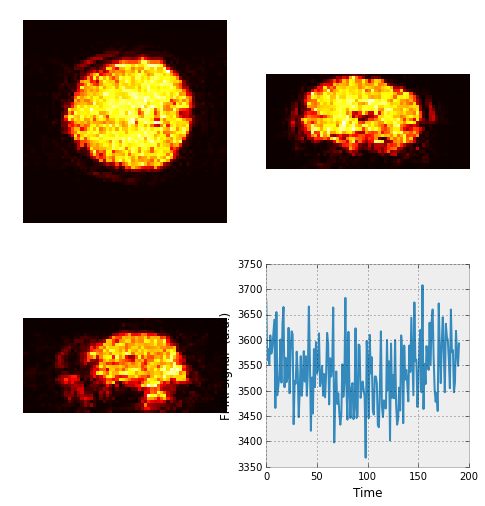

In [37]:
pb_widget = wdg.interactive(plot_tsnr, 
                            x=wdg.IntSliderWidget(min=1, max=data.shape[0], value=data.shape[0]//2),
                            y=wdg.IntSliderWidget(min=1, max=data.shape[1], value=data.shape[1]//2),
                            z=wdg.IntSliderWidget(min=1, max=data.shape[2], value=data.shape[2]//2)
                            )
display.display(pb_widget)